<a href="https://colab.research.google.com/github/xhxuciedu/CS206/blob/master/svd_compression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import random
import cv2

In [2]:
plt.rcParams['figure.figsize'] = (10, 6)

In [3]:
!git clone https://github.com/xhxuciedu/CS206.git

Cloning into 'CS206'...
remote: Enumerating objects: 176, done.
remote: Counting objects: 100% (18/18), done.
remote: Compressing objects: 100% (18/18), done.
remote: Total 176 (delta 5), reused 0 (delta 0), pack-reused 158 (from 1)
Receiving objects: 100% (176/176), 20.67 MiB | 8.73 MiB/s, done.
Resolving deltas: 100% (82/82), done.


In [4]:
img = cv2.imread('CS206/lenna.jpg')

In [5]:
img.shape

(512, 512, 3)

In [6]:
img = img[:,:,0]

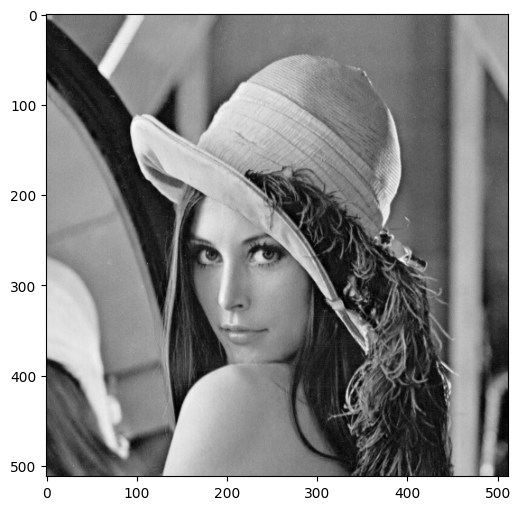

In [7]:
plt.imshow(img, cmap='gray')

## Compress images using SVD
* The original image is represented by matrix $A$.

* First, find SVD of $A$,
$$A=U\Sigma V^T$$

* Second, reconstruct the image using the top $k$ rank-1 matrices ranked by singular values
$$\bar A = \sum_{i=1}^k \sigma_i u_i v_i^T$$





In [28]:
# find SVD of img
U, sigma, V = np.linalg.svd(img)

In [29]:
U.shape, sigma.shape, V.shape

((512, 512), (512,), (512, 512))

In [30]:
# calculate the norm of the matrix

# induced 2-norm
print('Induced 2-norm:', np.linalg.norm(img, 2))
print(sigma[0])

print('Frobenius norm')
print(np.linalg.norm(img,'fro'))
print(np.sqrt(np.sum(sigma**2)))

Induced 2-norm: 62278.340752429045
62278.34075242901
Frobenius norm
67222.01888518374
67222.01888518372


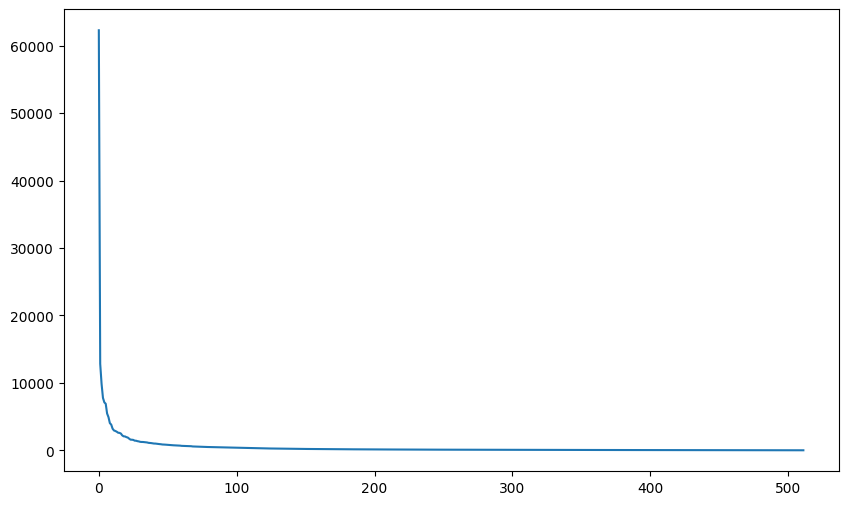

In [31]:
plt.plot(sigma)

(array([481.,  15.,   6.,   3.,   1.,   2.,   1.,   1.,   0.,   0.,   1.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   1.]),
 array([1.15507419e-01, 1.24568001e+03, 2.49124452e+03, 3.73680902e+03,
        4.98237353e+03, 6.22793803e+03, 7.47350254e+03, 8.71906704e+03,
        9.96463155e+03, 1.12101961e+04, 1.24557606e+04, 1.37013251e+04,
        1.49468896e+04, 1.61924541e+04, 1.74380186e+04, 1.86835831e+04,
        1.99291476e+04, 2.11747121e+04, 2.24202766e+04, 2.36658411e+04,
        2.49114056e+04, 2.61569701e+04, 2.74025346e+04, 2.86480991e+04,
        2.98936636e+04, 3.11392281e+04, 3.23847926e+04, 3.36303571e+04,
        3.48759216e+04, 3.61214861e+04, 3.73670507e+04, 3.86126152e+04,
        3.98581797e+04, 4.11037442e+04, 4.23493087e+04, 4.35948732e+04,
        4.

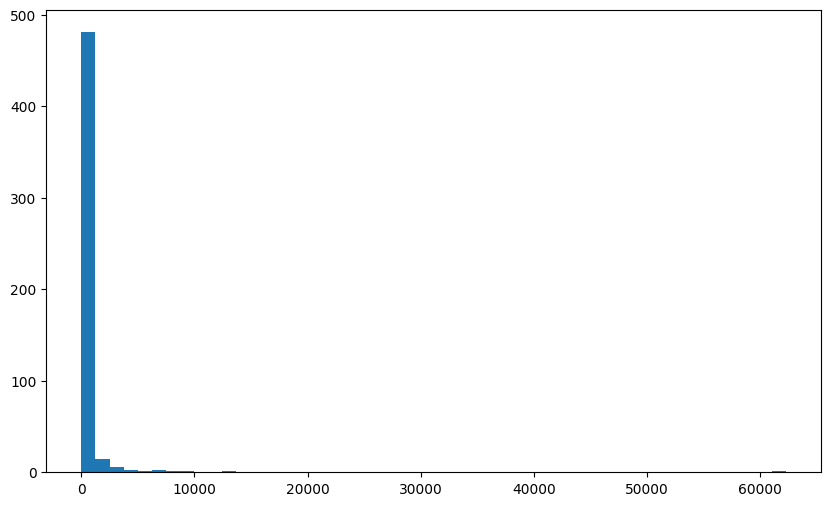

In [32]:
plt.hist(sigma,50)

In [41]:
k = 150
#img2 = np.matrix(U[:, :k]) * np.diag(sigma[:k]) * np.matrix(V[:k, :])
img2 = U[:, :k] @ np.diag(sigma[:k]) @ V[:k, :]

(np.float64(-0.5), np.float64(511.5), np.float64(511.5), np.float64(-0.5))

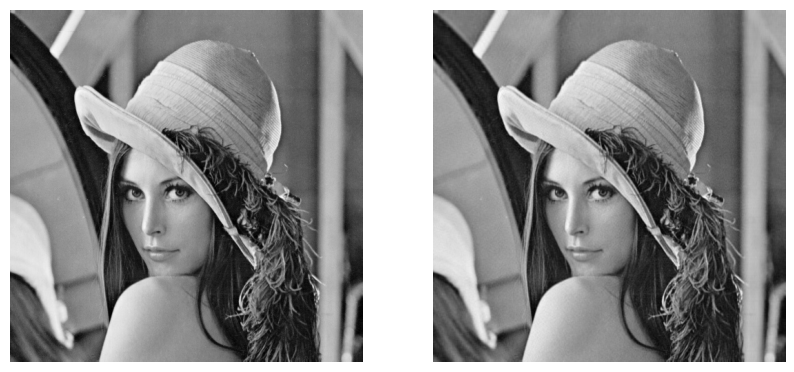

In [42]:
fig,ax = plt.subplots(1,2,sharex=True)
ax[0].imshow(img,cmap='gray')
ax[0].axis('off')
ax[1].imshow(img2,cmap='gray')
ax[1].axis('off')

##SVD Compress Color Images

In [15]:
face = cv2.imread('CS206/tiger-face-close-up.jpg')
face = face[:,:,[2,1,0,]]  # change channel to RGB

In [16]:
face.shape, face.dtype

((768, 1024, 3), dtype('uint8'))

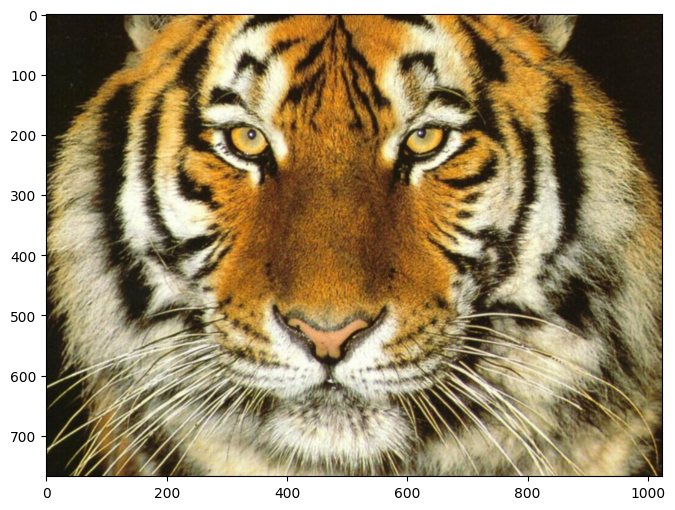

In [17]:
plt.imshow(face)

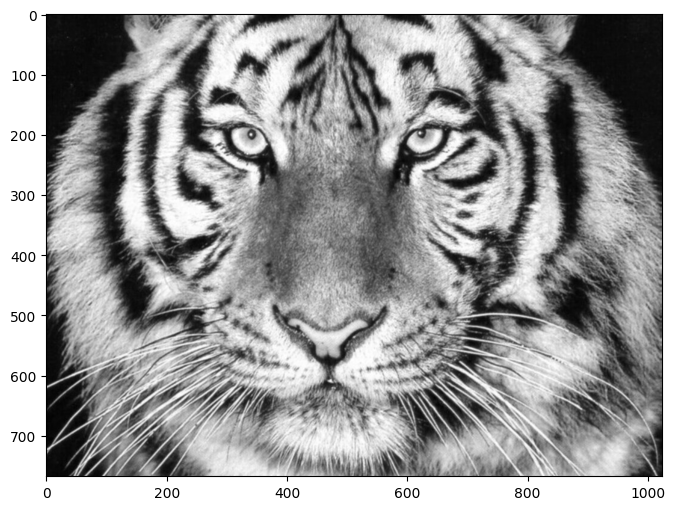

In [18]:
plt.imshow(face[:,:,0],cmap='gray')

In [19]:
U, sigma, V = np.linalg.svd(face[:,:,0])

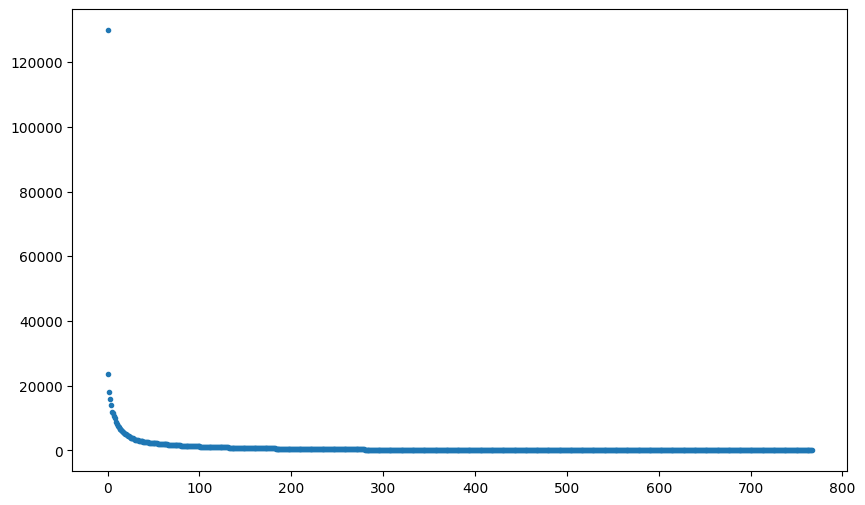

In [20]:
plt.plot(sigma,'.')

(array([675.,  53.,  15.,   6.,   5.,   3.,   2.,   1.,   2.,   1.,   1.,
          0.,   1.,   1.,   0.,   0.,   0.,   0.,   1.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          1.]),
 array([3.28415149e+00, 1.30205608e+03, 2.60082801e+03, 3.89959993e+03,
        5.19837186e+03, 6.49714379e+03, 7.79591571e+03, 9.09468764e+03,
        1.03934596e+04, 1.16922315e+04, 1.29910034e+04, 1.42897754e+04,
        1.55885473e+04, 1.68873192e+04, 1.81860911e+04, 1.94848631e+04,
        2.07836350e+04, 2.2082

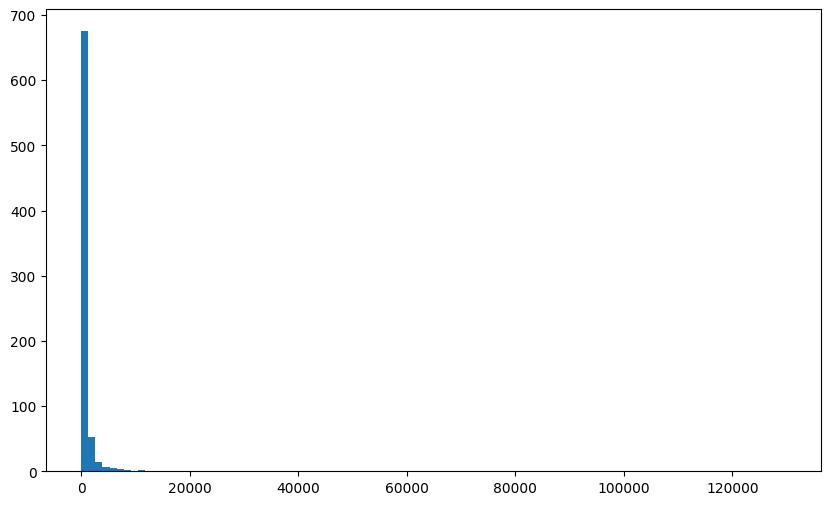

In [21]:
plt.hist(sigma,100)

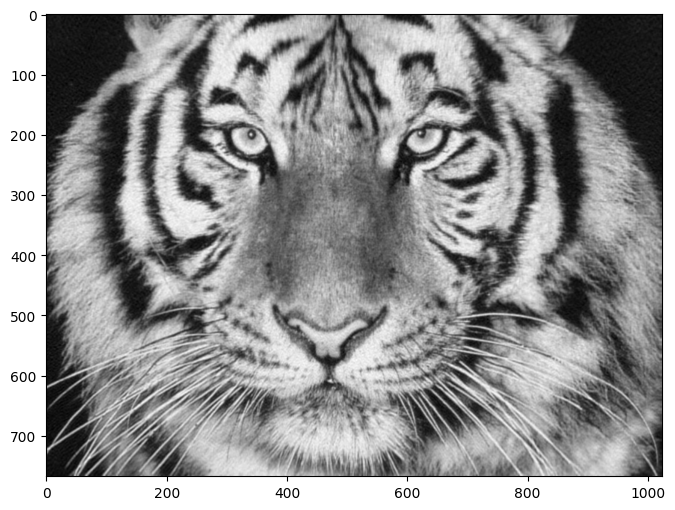

In [22]:
num_components = 150
reconstimg = np.matrix(U[:, :num_components]) * np.diag(sigma[:num_components]) * np.matrix(V[:num_components, :])

plt.imshow(reconstimg, cmap='gray');

In [43]:
num_components = 50

reimg = np.zeros(face.shape)
for i in range(3):
    U, sigma, V = np.linalg.svd(face[:,:,i])
    #reimg[:,:,i] = np.matrix(U[:, :num_components]) * np.diag(sigma[:num_components]) * np.matrix(V[:num_components, :])
    reimg[:,:,i] = U[:, :num_components] @ np.diag(sigma[:num_components]) @ V[:num_components, :]

In [44]:
reimg[np.where(reimg>=255)]=255
reimg[np.where(reimg<0)]=0

(np.float64(-0.5), np.float64(1023.5), np.float64(767.5), np.float64(-0.5))

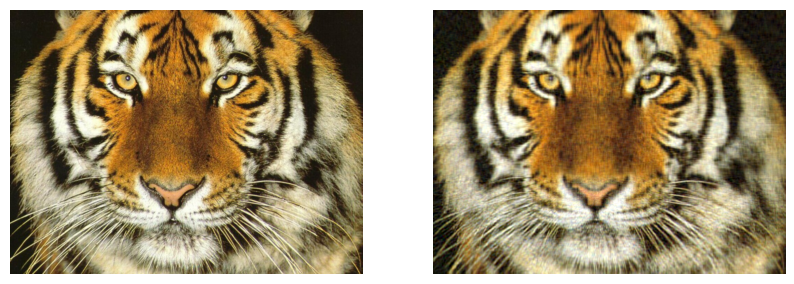

In [45]:
fig,ax = plt.subplots(1,2,sharex=True)
ax[0].imshow(face)
ax[0].axis('off')
ax[1].imshow(reimg.astype(face.dtype))
ax[1].axis('off')